[< list of demos](Introduction.ipynb#demos)

<a id='top'></a>
# Custom timing files

This demo shows how to calculate barycentric times ([TCB](https://en.wikipedia.org/wiki/Barycentric_Coordinate_Time) and [TDB](https://en.wikipedia.org/wiki/Barycentric_Dynamical_Time)) and radial velocity for a list of Julian dates, using τ Ceti as an example.

## Arguments:


`-p HD10700` - primary star: τ Ceti

`-i HARPS` - instrument: HARPS

`-t ../input/GJ551.tim` - file containing a list of Julian dates

`-m emulate` - PEXO mode

`-v 'JDutc BJDtdb BJDtcb ZB` - output variables

`-o ../results/tim-out.txt` - output file

### Timing file

The timing file should contain a list of Julian dates as a single column of integers or floats, or as two columns with the integer and decimal parts separated

In [2]:
from utilities import Table
Table("../input/GJ551.tim", header=None, take_top=3, take_bottom=1)

2448705.357
2448714.324
2448724.307
2448736.896
...
2450708.563


## Run the code

Execute PEXO with the command below. This may take a few minutes to compute.

In [2]:
# cd into the code directory
%cd ../code

# run PEXO via the R script
! Rscript pexo.R -p HD10700 -i HARPS -t ../input/GJ551.tim -m emulate -v 'JDutc BJDtdb BJDtcb ZB' -o ../results/tim-out.txt

/home/timberhill/repositories/pexo/code
Warning message:
package ‘optparse’ was built under R version 3.6.3 
Loading required package: polynom
Warning messages:
1: package ‘orthopolynom’ was built under R version 3.6.3 
2: package ‘polynom’ was built under R version 3.6.3 

Attaching package: ‘pracma’

The following object is masked from ‘package:polynom’:

    integral

Warning message:
package ‘pracma’ was built under R version 3.6.3 
Warning message:
package ‘foreach’ was built under R version 3.6.3 
Loading required package: iterators
Loading required package: parallel
Warning messages:
1: package ‘doMC’ was built under R version 3.6.3 
2: package ‘iterators’ was built under R version 3.6.3 
Warning message:
package ‘MASS’ was built under R version 3.6.3 

Input Parameters:
mode = emulate 	ins = HARPS 	Niter = 1000 	Planet = 0 	geometry = TRUE 	ncore = 4 	component = TAR 	time = ../input/GJ551.tim 	primary = HD10700 	mass = 1 	var = JDutc BJDtdb BJDtcb ZB 	out = ../results/tim-out.

## Output

The output file contains a table with the columns specified in `-v` argument above. Each row corresponds to the Julian dates in the timing file. Julian dates are divided into integer and decimal parts to preserve precision.

In [3]:
Table("../results/tim-out.txt", digits=24)

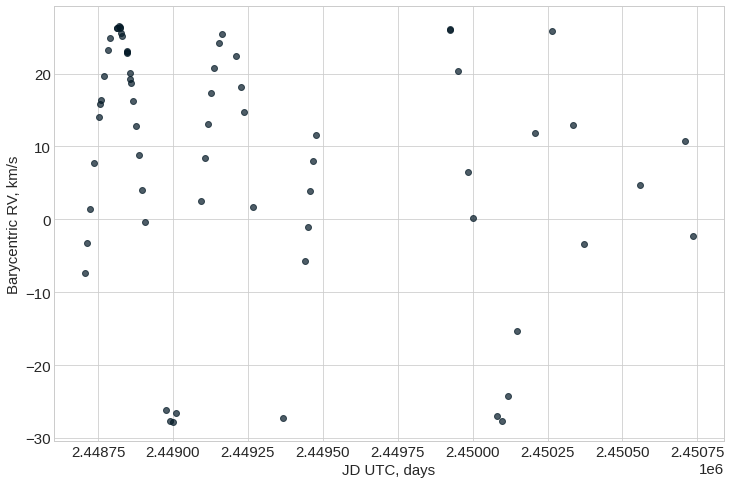

In [4]:
from utilities import Plot
p = Plot("../results/tim-out.txt", factors=(1, 299792.458)).add_plot(xcol=["JDutc1", "JDutc2"], ycol="ZB", marker="o")
o=p.axis.set_xlabel("JD UTC, days")
o=p.axis.set_ylabel("Barycentric RV, km/s")